<a href="https://colab.research.google.com/github/nealtheseal108/imitation/blob/main/Modern_AI_Pro_Class_2_Advanced_Home_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd # import of pandas
df = pd.read_csv("train.csv") # converts 'train.csv' to a DF
print(df)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

In [2]:
listOfColumns = df.columns.to_list() # converts the names of the columns in the DF to a list and prints
print(listOfColumns)

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC'

In [3]:
from matplotlib import pyplot as plt # imports the pyplot pacakge form the matplotlib library
%matplotlib inline
# magic command that displays plots directly in notebook cells

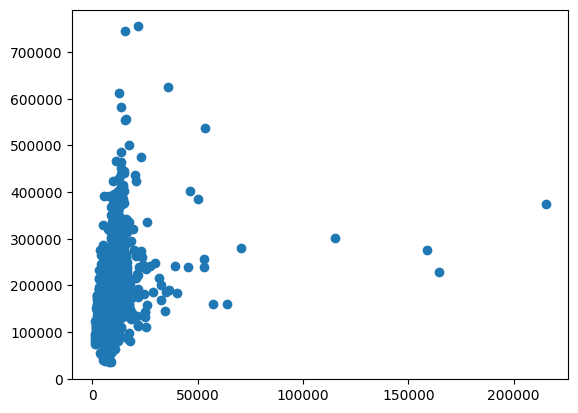

In [5]:
plt.scatter(df['LotArea'], df['SalePrice']) # displays a scatter plot of the lot area of a home in relation to its sale price

In [6]:
from sklearn.preprocessing import LabelEncoder

for col in listOfColumns: # iterates through each column in the list of columns
  if pd.api.types.is_numeric_dtype(df[col].dtype): # if the col is composed of numeric data types
    if df[col].isnull().any(): # if any variable instances in the feature are missing or null
      df[col].fillna(df[col].median(), inplace = True) # replace all null/NaN/missing values of the column with its median, essentially bringing the average value of the column closer to the median, which may result in outliers when predicting other variables on the basis of this one; other options would be to essentially nullify it by just leaving the value as is, or attempting to predict the value of the instance variable in accordance with other feature variables of the data point
      # may also create disparities between column relationships for training data and test data if there is a noise discrepancy, as supplanting a value with the median value of the column may result in data with a lower variation for dirtier data and may heavily skew realtionships for that column in particular, potentially having a negative effect on inferences
  else:
    df[col] = LabelEncoder().fit_transform(df[col]) # 'LabelEncoder.fit_transform()' takes each instance of a different value for the feature and assigns a number to it in order to its encounter (implicit ordinal relationship may come into play)


In [7]:
print(df)

        Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      2   
1        2          20         3         80.0     9600       1      2   
2        3          60         3         68.0    11250       1      2   
3        4          70         3         60.0     9550       1      2   
4        5          60         3         84.0    14260       1      2   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      2   
1456  1457          20         3         85.0    13175       1      2   
1457  1458          70         3         66.0     9042       1      2   
1458  1459          20         3         68.0     9717       1      2   
1459  1460          20         3         75.0     9937       1      2   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...        

In [10]:
X = df.drop('SalePrice', axis = 'columns') # assigns predictor features or input features to the rest of the features in the dataset
y = df['SalePrice'] # assigns target feature to the SalePrice

In [11]:
from sklearn.linear_model import LinearRegression # imports LinReg model (multi-feature, essentially linearly weights each feature in determining price)
trainer = LinearRegression() # assigns model to variable
trainer.fit(X, y) # utilizes respective datasets to train model

LinearRegression()

In [13]:
from sklearn.model_selection import train_test_split #
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2, random_state =  )
